<a href="https://colab.research.google.com/github/Roberto-Ulises-Cruz-Olivares/EDPI/blob/main/Polinomios_de_Legendre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**$a)$ Graficar en un solo panel los polinomios de Legendre $P_n (x)$ para $n=0,1,2,3,4,5$**

In [38]:
import numpy as np
from scipy.special import eval_legendre

dominio = np.linspace(-1, 1) # Definimos el dominio de nuestra grafica

**Creamos un for el cual vaaya ploteando cada Polinomio desde 0 hasta 5 y ploteamos con matplotlib.pyplot**

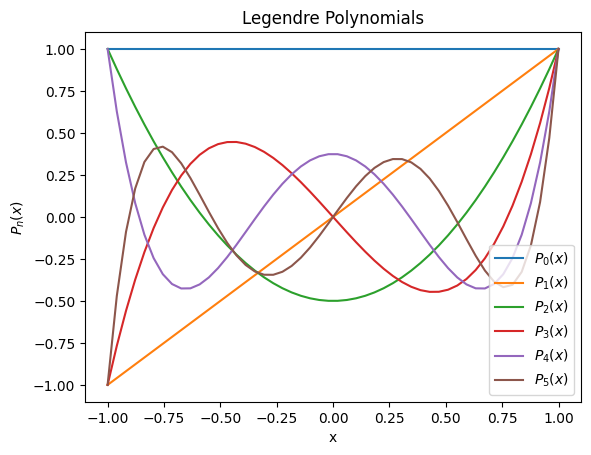

In [39]:
import matplotlib.pyplot as plt

for n in range(0, 6):
    P = eval_legendre(n, dominio) # Polinomio definido con scipy
    plt.plot(dominio, P, label=r'$P_{}(x)$'.format(n))

plt.title("Legendre Polynomials")
plt.xlabel("x")
plt.ylabel(r'$P_n(x)$')
plt.legend(loc='lower right')
plt.show()

**b) Mostrar Graficamente que se satisface la relacion: (hagalo pra n = 3)**
$$
(1-x^2)P'_n (x) = (n+1) x P_n (x) - (n+1)P_{n+1} (x)
$$

**Escribiremos las ecuacion por separado y las graficaremos para observar graficamente como son iguales**

In [40]:
import sympy as sp
from scipy.special import legendre

x = sp.symbols('x')
n=3
Pn = sp.legendre(n, x) # Polinomio de legrende Pn
Pn_1 = sp.legendre(n+1, x) # Polinomio de legendre Pn+1

eq_izq = (1-x**2)*sp.diff(Pn, x) # Ecuacion izquierda
eq_der = (n+1)*x*Pn - (n+1)*Pn_1 # Ecuacion derecha

**Convertimos las ecuaciones en funciones para plotear con lambdify**

In [60]:
eq_izq_func = sp.lambdify(x, eq_izq, 'numpy')
eq_der_func = sp.lambdify(x, eq_der, 'numpy')

<function _lambdifygenerated at 0x78c92284cc20>
<function _lambdifygenerated at 0x78c92284c900>


**Graficamos**

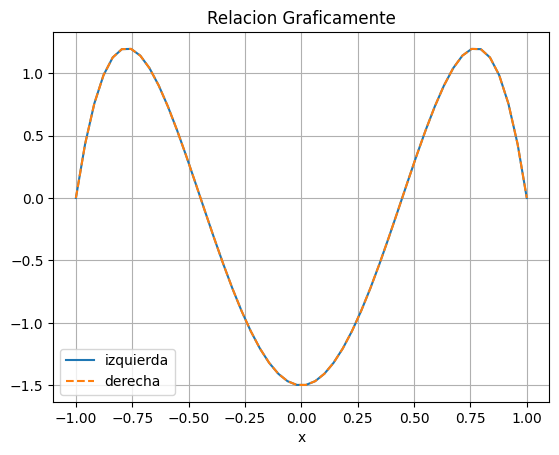

In [42]:
# Graficamos
plt.plot(dominio, eq_izq_func(dominio), label='izquierda')
plt.plot(dominio, eq_der_func(dominio), label='derecha', linestyle='dashed')

plt.title("Relacion Graficamente")
plt.xlabel("x")
plt.legend()
plt.grid(True)
plt.show()

**c) Mostrar algebraicamente que se satisface la relacion: (hagalo pra n = 3)**
$$
(1-x^2)P'_n (x) = (n+1) x P_n (x) - (n+1)P_{n+1} (x)
$$

**Simplificamos las ecuaciones anteriores y las comparamos para ver si algebraicamente es cierto**

In [61]:
simplificada_izq = sp.simplify(eq_izq) # Simplificamos el lado izq a su minima expresion

simplificada_der = sp.simplify(eq_der) # Simplificamos el lado derecho a su min expresion

if (simplificada_izq == simplificada_der): #Verificamos algebraicamente la expresion

    print("La relacion se cumple")
else:
    print("La relacion no se cumple")


La relacion no se cumple
105*x**4/8 - 63*x**2/4 + 21/8
0


Ecuacion de la izquierda:
$$
105x^{4/8} - 63x^{2/4} + 21/8
$$
si evaluamos n=3 es igual a
$$
105x^{4/8} - 63x^{2/4} + 21/8=0
$$

In [62]:
print(simplificada_izq)
print(simplificada_der)

105*x**4/8 - 63*x**2/4 + 21/8
0


d) Mostrar algebraicamente que se satisface la relacion: (hagalo para n=3)
$$
(n+1)P_{n+1} (x) - (2n+1)xP_n(x) + nP_{n-1}(x) = 0, n= 1,2,3,...
$$

Primero escribimos el lado izq y derecho

In [53]:
x = sp.symbols('x')
n=3
Pn = sp.legendre(n, x) # Polinomio de legrende Pn
Pn_1 = sp.legendre(n+1, x) # Polinomio de legendre Pn+1
Pn_menos_1 = sp.legendre(n-1, x) # Polinomio de legendre Pn-1

eq1_izq = (n+1)*Pn_1 - (2*n+1)*x*Pn + n*Pn_menos_1  # Ecuacion izquierda
eq2_der = 0 # Ecuacion derecha

Verificamos si se cumple algebraicamente simplificandola a su max expresion

In [54]:

simplificada_izq = sp.simplify(eq1_izq) # Simplificamos el lado izq a su minima expresion

simplificada_der = sp.simplify(eq2_der) # Simplificamos el lado derecho a su min expresion

if (simplificada_izq == simplificada_der): #Verificamos algebraicamente la expresion

    print("La relacion se cumple")
else:
    print("La relacion no se cumple")

La relacion se cumple


e) Muestre que se cumple la fomrula de Rodrigues, ejemplificando para n=0, 1 ,2,..,5
Sea
$$
g(x)=(x^2-1)^n
$$
$$
P_n(x) = g^n(x)/(2^n n!)
$$

Vamos con un for calcular la formula de rodrigues y la vamos a restar con la funcion de legendre y a partir de esto si da cero como son funciones booleanas si retorna **true** significa que son iguales de lo contrario no se cumple

In [59]:
from math import factorial

for n in range(6):
    if n == 0:  # El caso cuando n = 0 para que la division de la formula de rodrigues no de 0 es decir error
        rodrigues = 1
    else:
        rodrigues = (1 / (2**n * factorial(n))) * sp.diff((x**2 - 1)**n, x, n) # Formula de rodrigues
    legendre_sym = sp.legendre(n, x)
    print(f"n = {n}:", sp.simplify(rodrigues - legendre_sym) == 0) # Si la resta de estos da cero significa que son iguales por lo tanto la formula si se cumple

n = 0: True
n = 1: True
n = 2: True
n = 3: True
n = 4: True
n = 5: True
